In [48]:
import statbotics
from typing import Literal, TypeAlias
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm, trange
from functools import cache

sb = statbotics.Statbotics()

In [49]:
District: TypeAlias = Literal[
    "fsc",  # FIRST South Carolina
    "fnc",  # FIRST North Carolina
    "ne",  # New England
    "ont",  # Ontario
    "pnw",  # Pacific Northwest
    "fit",  # FIRST in Texas
    "fim",  # FIRST in Michigan
    "fin",  # FIRST in Indiana
    "fma",  # FIRST Mid-Atlantic
    "pch",  # Peach State
    "chs",  # Chesapeake
    "isr",
]

district_to_states: dict[District, list[str]] = {
    "fsc": ["SC"],
    "fnc": ["NC"],
    "ne": ["MA", "CT", "NH", "ME", "RI", "VT"],
    "ont": ["ON"],
    "pnw": ["WA", "OR", "AK"],
    "fit": ["TX", "NM"],
    "fim": ["MI"],
    "fin": ["IN"],
    "fma": ["PA", "NJ"],
    "pch": ["GA"],
    "chs": ["VA", "MD"],
}

district_to_countries: dict[District, list[str]] = {
    "isr": ["Israel"],
}

district_to_first_year: dict[District, int] = {
    "fsc": 2025,
    "chs": 2016,
    "isr": 2017,
    "pch": 2016,
    "ne": 2015,
    "fma": 2012,
    "fim": 2009,
    "fin": 2015,
    "fnc": 2016,
    "pnw": 2014,
    "ont": 2017,
    "fit": 2019,
}

district_to_name: dict[District, str] = {
    "fsc": "FIRST South Carolina",
    "fnc": "FIRST North Carolina",
    "ne": "New England",
    "ont": "Ontario",
    "pnw": "Pacific Northwest",
    "fit": "FIRST in Texas",
    "fim": "FIRST in Michigan",
    "fin": "FIRST in Indiana",
    "fma": "FIRST Mid-Atlantic",
    "pch": "Peachtree",
    "chs": "Chesapeake",
    "isr": "FIRST Israel",
}

def get_teams_in_year(district: District, year: int) -> list[dict]:
    if year < district_to_first_year[district]:
        if district in district_to_states:
            return [
                team_year
                for state in district_to_states[district]
                for team_year in sb.get_team_years(year=year, state=state, limit=600)
            ]
        elif district in district_to_countries:
            return [
                team_year
                for country in district_to_countries[district]
                for team_year in sb.get_team_years(
                    year=year, country=country, limit=600
                )
            ]
    return sb.get_team_years(year=year, district=district, limit=600)

@cache
def get_percentile(district: District, year: int, percentile: float) -> float:
    if year == 2021:
        return np.nan
    return np.percentile(
        [team["epa"]["norm"] for team in get_teams_in_year(district, year)], percentile
    )

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

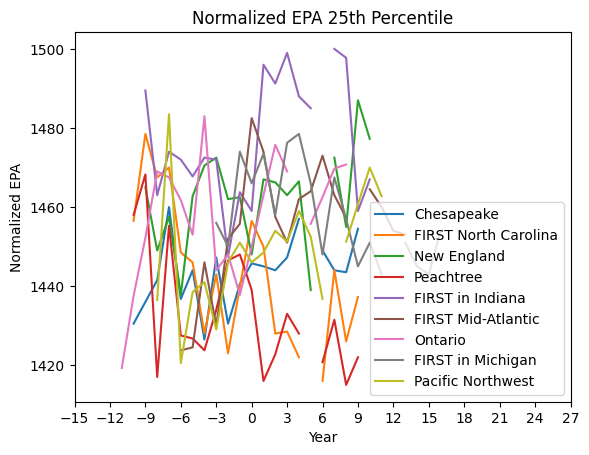

In [50]:
for district in tqdm(("chs", "fnc", "ne", "pch", "fin", "fma", "ont", "fim", "pnw")):
    percentiles = []
    for year in trange(2006, 2026, leave=False):
        percentiles.append(get_percentile(district, year, 25))
    plt.plot(
        list(range(2006 - district_to_first_year[district], 2026 - district_to_first_year[district])),
        percentiles,
        label=district_to_name[district],
    )

plt.title("Normalized EPA 25th Percentile")
plt.xlabel("Year")
plt.ylabel("Normalized EPA")
plt.xticks(list(range(-15, 30, 3)))
plt.legend()